In [6]:
import sys

sys.path.append("..")
from util import load_base_data

import neurokit2 as nk

SAMPLING_RATE = 300

In [2]:
X_train, y_train, X_test = load_base_data()

In [25]:
def make_signals(ecg):
    signals, info = nk.ecg_process(ecg_signal=ecg, sampling_rate=SAMPLING_RATE)
    nk.ecg_plot(signals, info)
    return signals, info

In [36]:
def make_features(ecg):
    signals, info = make_signals(ecg)
    features = nk.ecg_intervalrelated(signals, sampling_rate=SAMPLING_RATE)
    return features

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:101: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:153: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


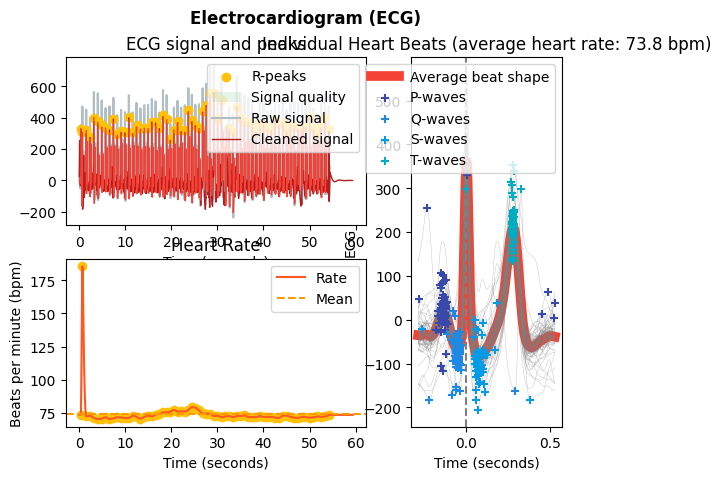

In [38]:
ecg_features = make_features(X_train.iloc[0])

# Bio Process

In [31]:
preprocessed, info = nk.bio_process(ecg=X_train.iloc[0], sampling_rate=SAMPLING_RATE)
results = nk.bio_analyze(preprocessed, sampling_rate=SAMPLING_RATE)

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:101: NeuroKitWarning: There are 1485 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/ecg/ecg_clean.py:153: FutureWarning: DataFrame.pad/Series.pad is deprecated. Use DataFrame.ffill/Series.ffill instead
  ecg_signal = pd.DataFrame.pad(pd.Series(ecg_signal))
/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


In [32]:
results

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,73.815985,[[815.8585858585858]],[[65.38266218878302]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[63.71142204617081]],...,[[0.4525695772956377]],[[4.141016711134489]],[[0.38566264652850274]],[[0.21603864749890622]],[[0.3809198942913523]],[[0.35528471260811445]],[[0.7900848196990945]],[[1.7042804985314337]],[[1.1947648984005386]],[[0.45790864540594345]]


# HRV Indices
Already contained in the above analysis.

In [40]:
def make_hrv(ecg):
    peaks, info = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)
    hrv_indices = nk.hrv(peaks, sampling_rate=SAMPLING_RATE, show=True)
    return hrv_indices

/Users/ericschreiber/miniconda3/envs/ml/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


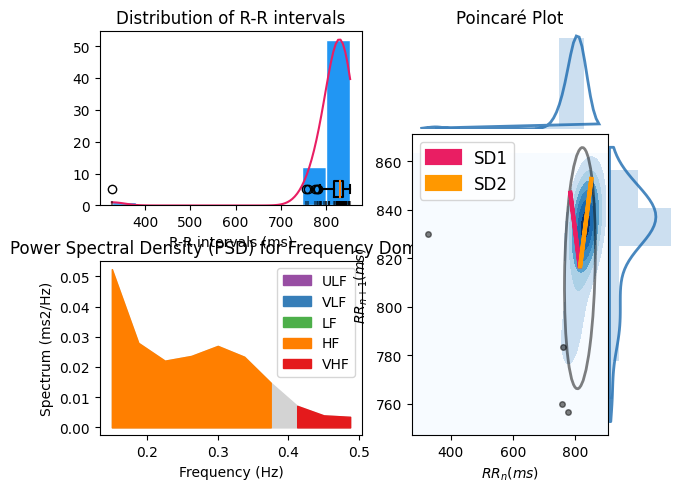

In [41]:
hrv_indices = make_hrv(X_train.iloc[0])

In [46]:
hrv_indices

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,815.897436,65.446568,NaN,NaN,NaN,NaN,NaN,NaN,63.654613,63.666257,...,0.374693,4.099141,0.364332,0.207445,0.375777,0.355069,0.77074,1.689945,1.176653,0.463259


In [49]:
# check if all the colums of hrv_indeces are already contained in the results
for col in hrv_indices.columns:
    if col not in results.columns:
        print(col)